### How well did the clustering algorithm do? What is the best number of clusters?

The clustering algorithm performed well in distinguishing and forming separate clusters with some similar charateristics with the clusters of the original data. The best number of clusters that most resemble the original ones is 3.

### What would be some challenges in assessing cluster performance?

When too many variables are being taken into consideration, it can become very messy or confusing to assess a cluster and it is also difficult to distinguish patterns among our data.

# Supervised and Unsupervised Learning

We think of a given dataset upon which we are working as a representation of some actual phenomenon. As data scientists, we seek a function, $\hat{f}$ ("eff hat"), that we can use to approximate this actual phenomenon. We may take different approaches in developing this $\hat{f}$.

In some cases, we have a set of input data, often called **features**, inputs, or independent variables, and we believe that these features can be uses to predict a **target**, output or dependent variable. If we seek to develop a model that fits a set of features to a target, this is known as **Supervised Learning**. The supervision comes from the fact that the targets or outputs are known. If the target consists of elements coming from a finite set of discrete categories e.g. $\{red, blue, green\}$, $\{heads, tails\}$, then we say that the task is a **classification** task and our $\widehat{f}$ is a classfication model. If the target consists of elements coming from a continuous range of values e.g. *Age* or *SalePrice*, then we say that the task is a **regression** task and our $\widehat{f}$ is a regression model.

**NOTE**: The reasoning behind the name "regression" is historical and is not consistent with the colloquial meaning of the word.

In other cases, we might seek to develop a model from a set of features without any corresponding target data. This type of model development is known as **Unsupervised Learning**. It is unsupervised because the targets are unknown. Common unsupervised learning tasks are **clustering**, in which we attempt to assign our data to a finite number of groups, and **dimensionality reduction**.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

In [2]:
IRIS = load_iris()

feat_names = IRIS.feature_names

iris_df = pd.DataFrame(IRIS.data, columns=feat_names)

IRIS.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

### Clustering

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(iris_df)
iris_2d = pca.fit_transform(features_scaled)

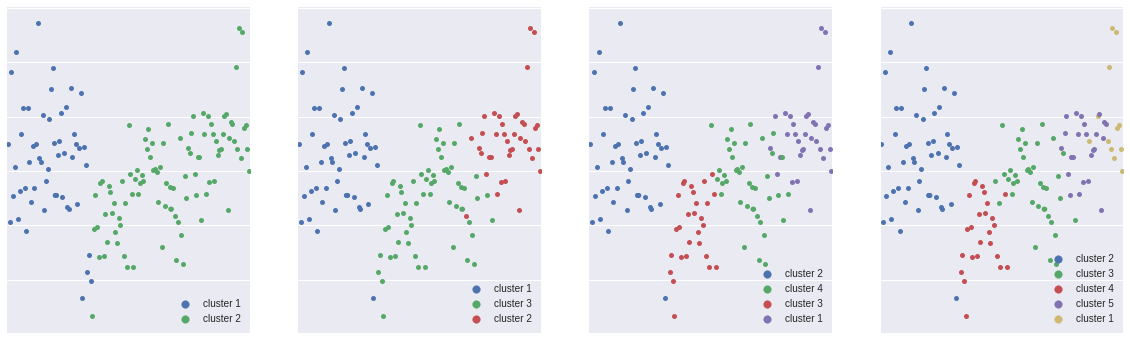

In [6]:
from sklearn.cluster import KMeans

number_of_clusters = [2,3,4,5]

_, ax = plt.subplots(1,4, figsize=(20,6))

for i, clusters in enumerate(number_of_clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(iris_df)
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    sns.swarmplot(x=iris_2d[:,0], y=iris_2d[:,1], hue=labels, ax=ax[i])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].legend(loc='lower right')

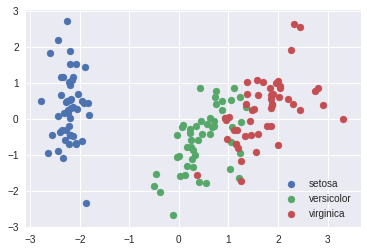

In [5]:
for label in IRIS.target_names:
    group_mask = np.array([IRIS.target_names[n] for n in IRIS.target]) == label
    group = iris_2d[group_mask]
    plt.scatter(group[:, 0], group[:, 1], label=label)
plt.legend()